**YOLOV8 Project for Suspicious Activity and Weapon Detection**
Introduction -
*The YOLOv8 project aims to enhance security and safety in public spaces such as schools, parks, and other communal areas by leveraging advanced deep learning techniques for suspicious activity and weapon detection. This project utilizes the state-of-the-art Ultralytics YOLOv8 framework to fine-tune a model specifically designed for identifying unusual behaviors and potential threats in real-time video feeds. By integrating this model into a Flask application, it provides a robust, automated system capable of monitoring and alerting authorities to suspicious activities, thereby improving response times and overall public safety.*

By: Anuroop Arya

**1. Environment Setup**

Initializes the working directory and prints the current path.

In [11]:
import os
HOME = os.getcwd()
print(HOME)

/content


**2. Ultralytics YOLO Installation and Setup**

Installs necessary packages and creates a directory for the datasets.

In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.8/78.2 GB disk)


**3. Roboflow Dataset Preparation**

Uses the Roboflow API to download a dataset for suspicious activity and weapon detection.

In [4]:
!pip install roboflow


from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import display, Image

# Create a directory for datasets
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Initialize Roboflow and download dataset
rf = Roboflow(api_key="WUsRlTLfexV872VLtU6S")
project = rf.workspace("suspicious-movement").project("suspicious-detection")
version = project.version(7)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


**Fine-tuning**

Trains the YOLOv8 model using the downloaded dataset with specified parameters such as image size, epochs, and batch size.

In [5]:

%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/suspicious-detection-7/data.yaml epochs=50 imgsz=512 batch=8 plots=True workers=4


/content
100% 6.23M/6.23M [00:00<00:00, 275MB/s]
New https://pypi.org/project/ultralytics/8.2.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/suspicious-detection-7/data.yaml, epochs=50, patience=50, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, s

**Training Output and Results**

Displays training progress and results, including loss metrics and accuracy.

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1722965544.a00af1c17a9f.4530.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch18120.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch18121.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch18122.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


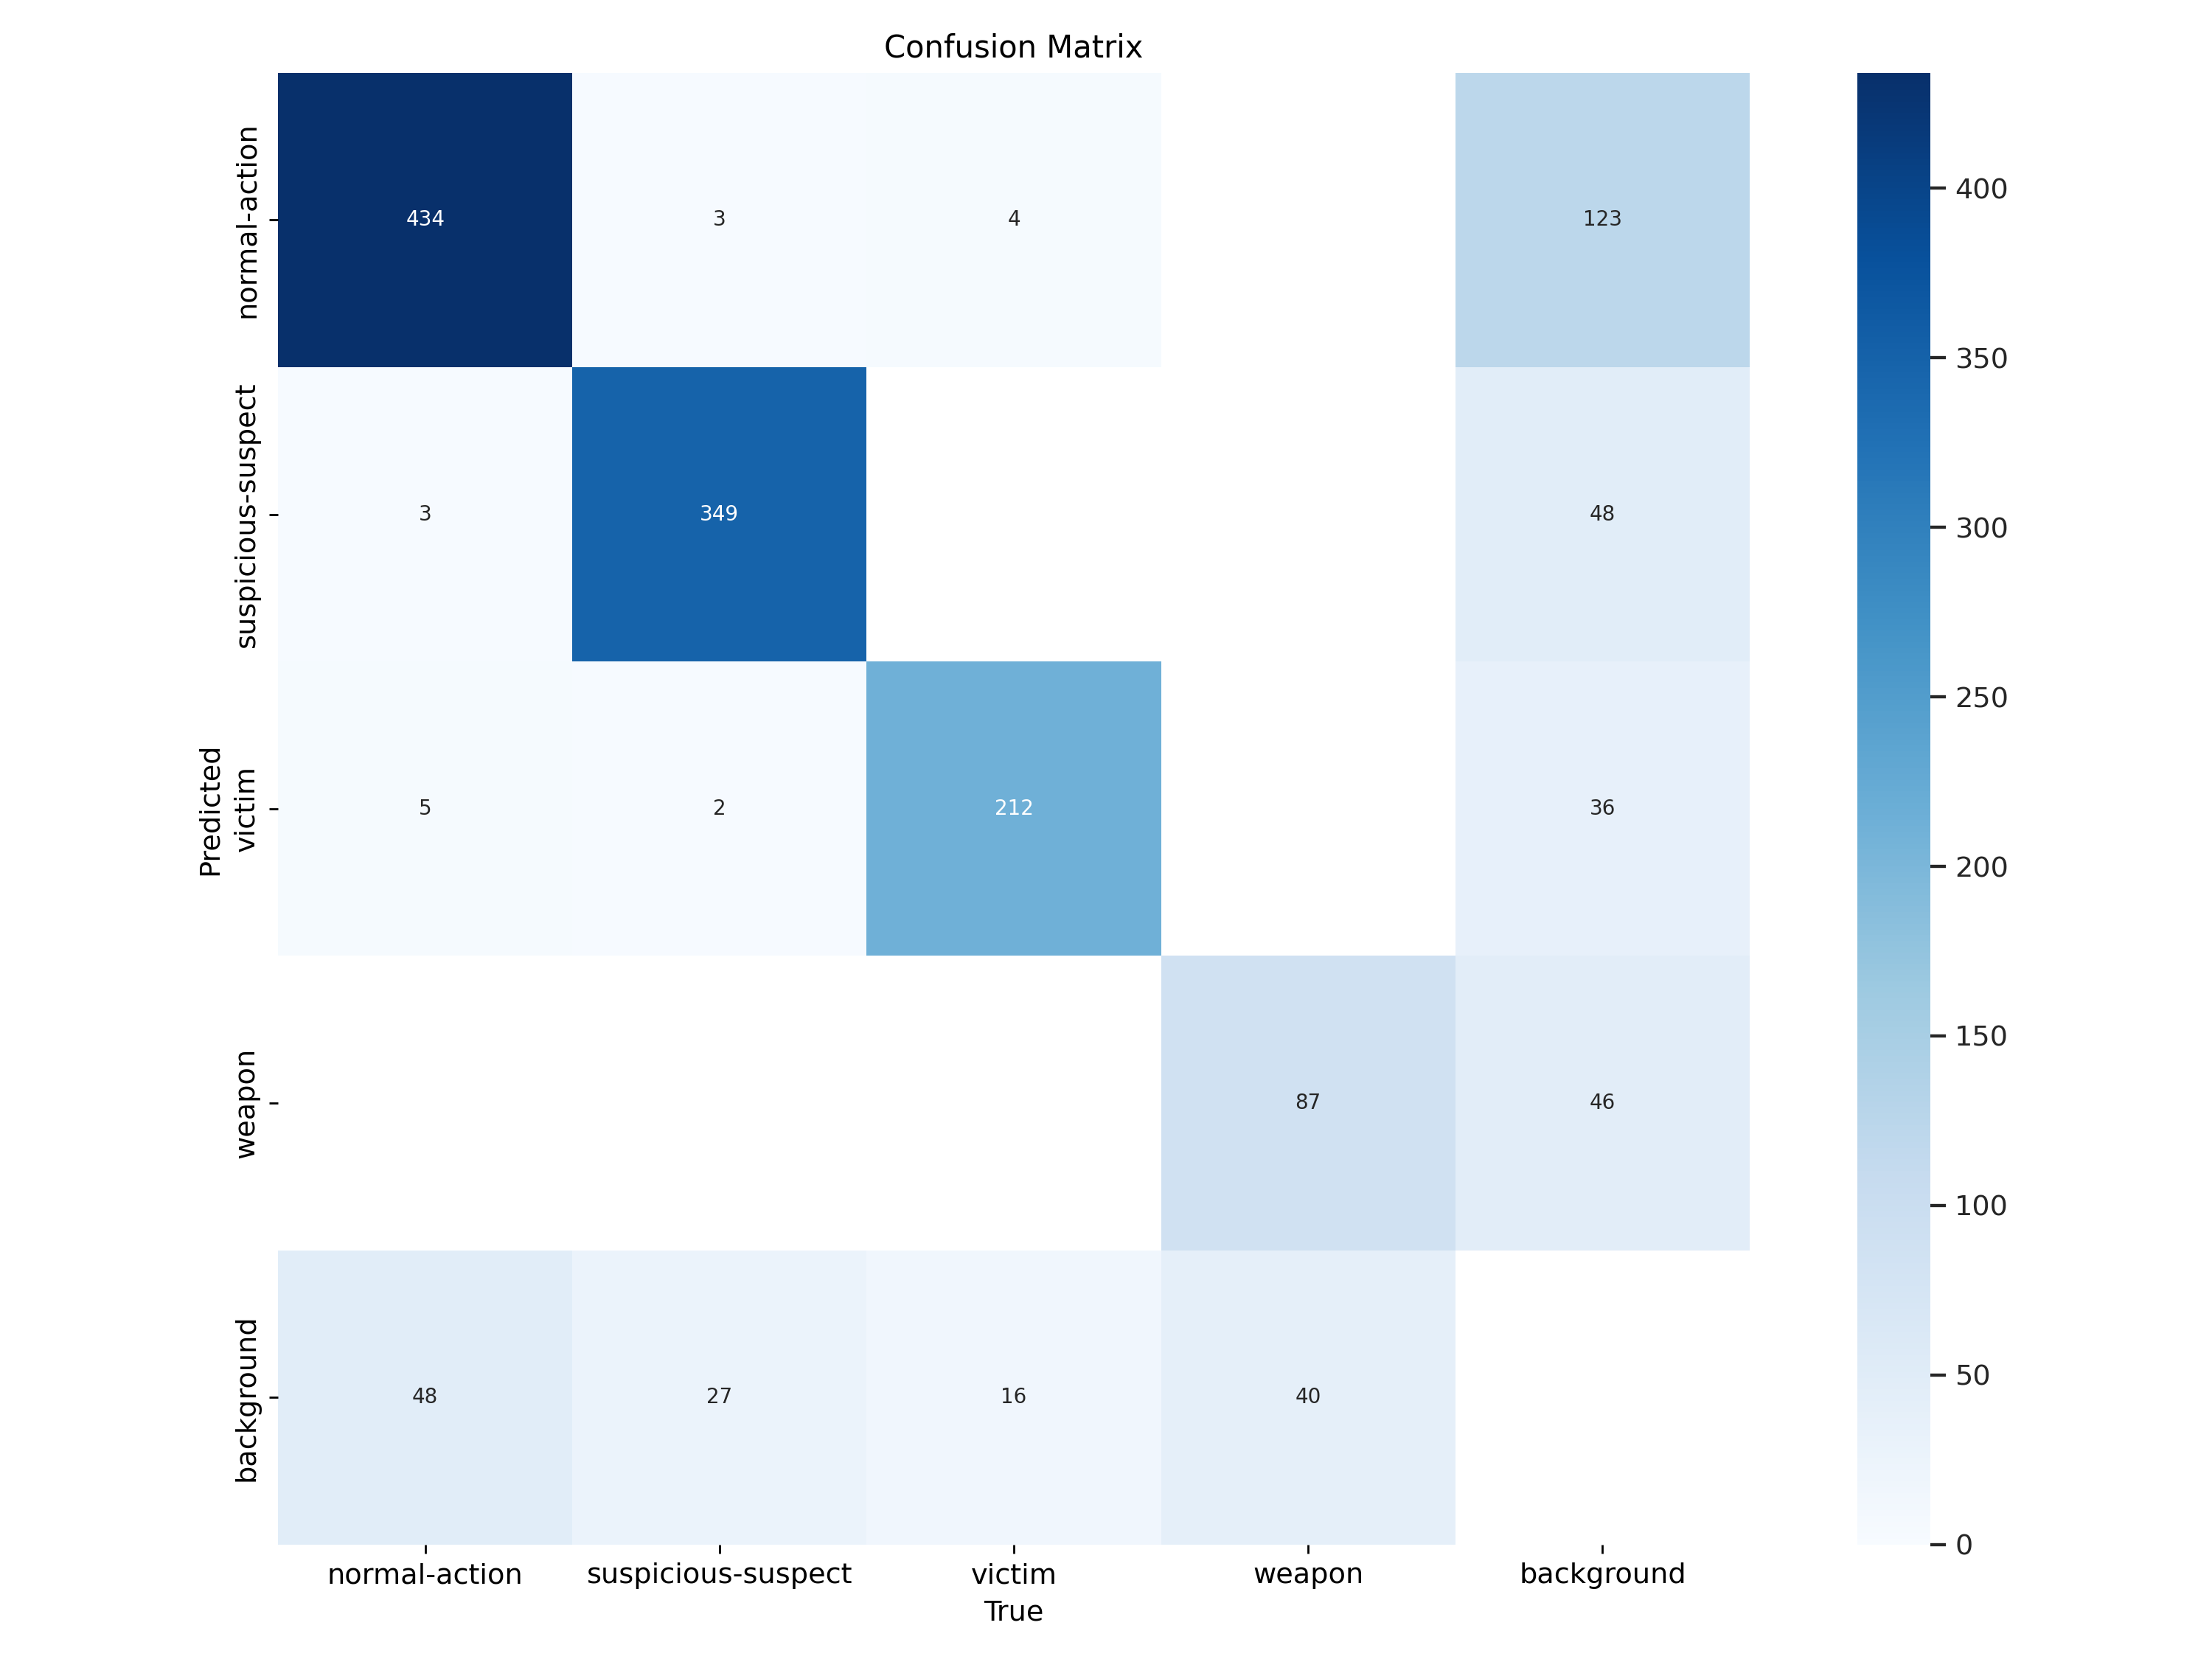

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


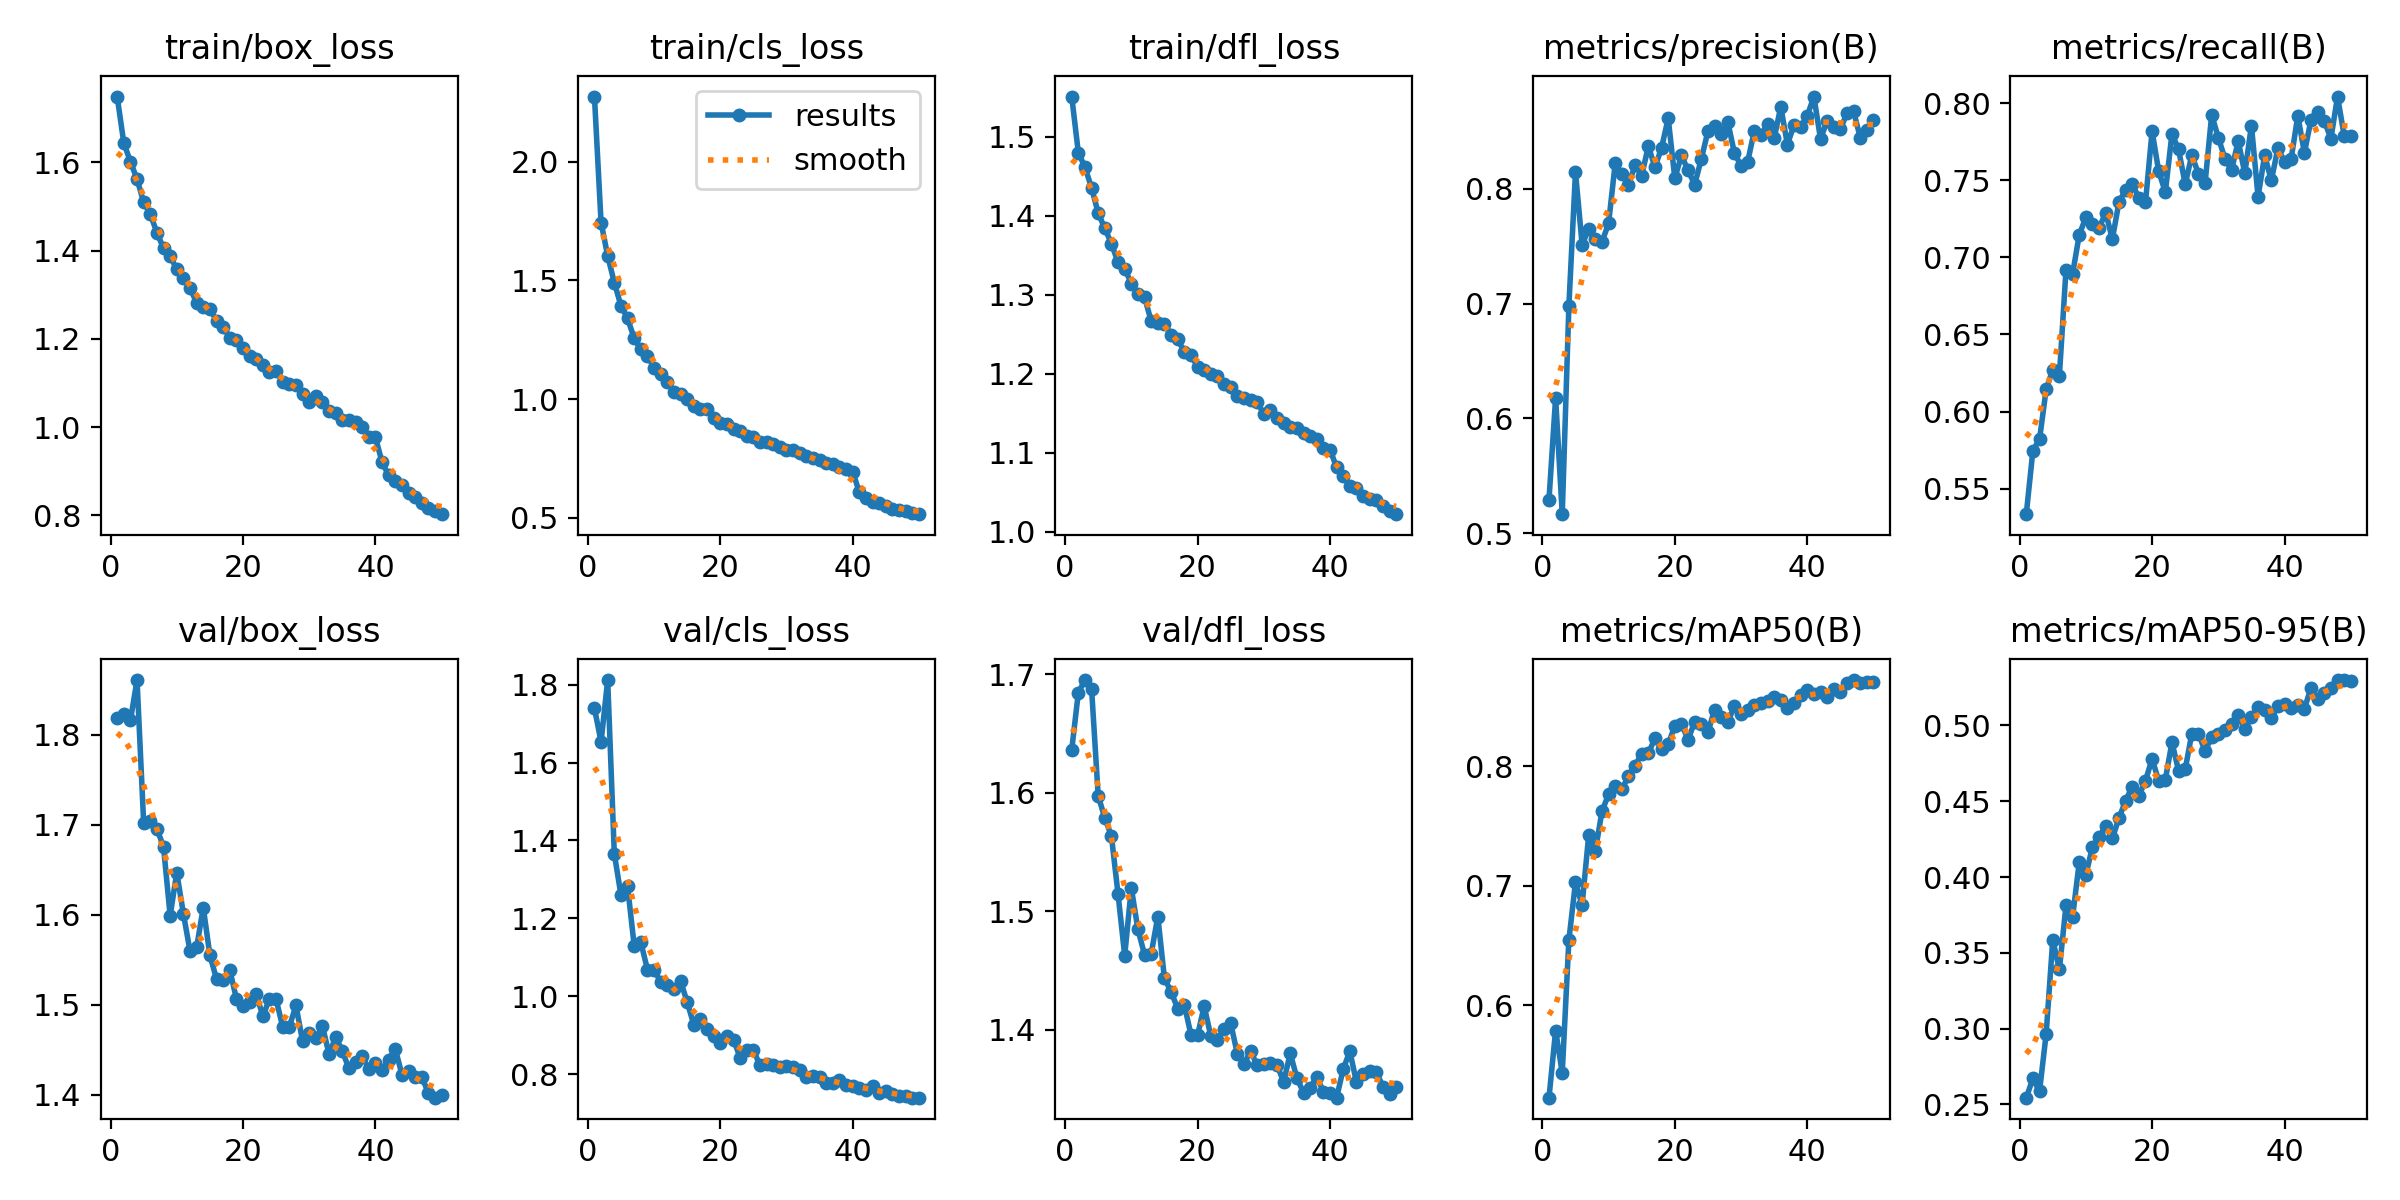

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


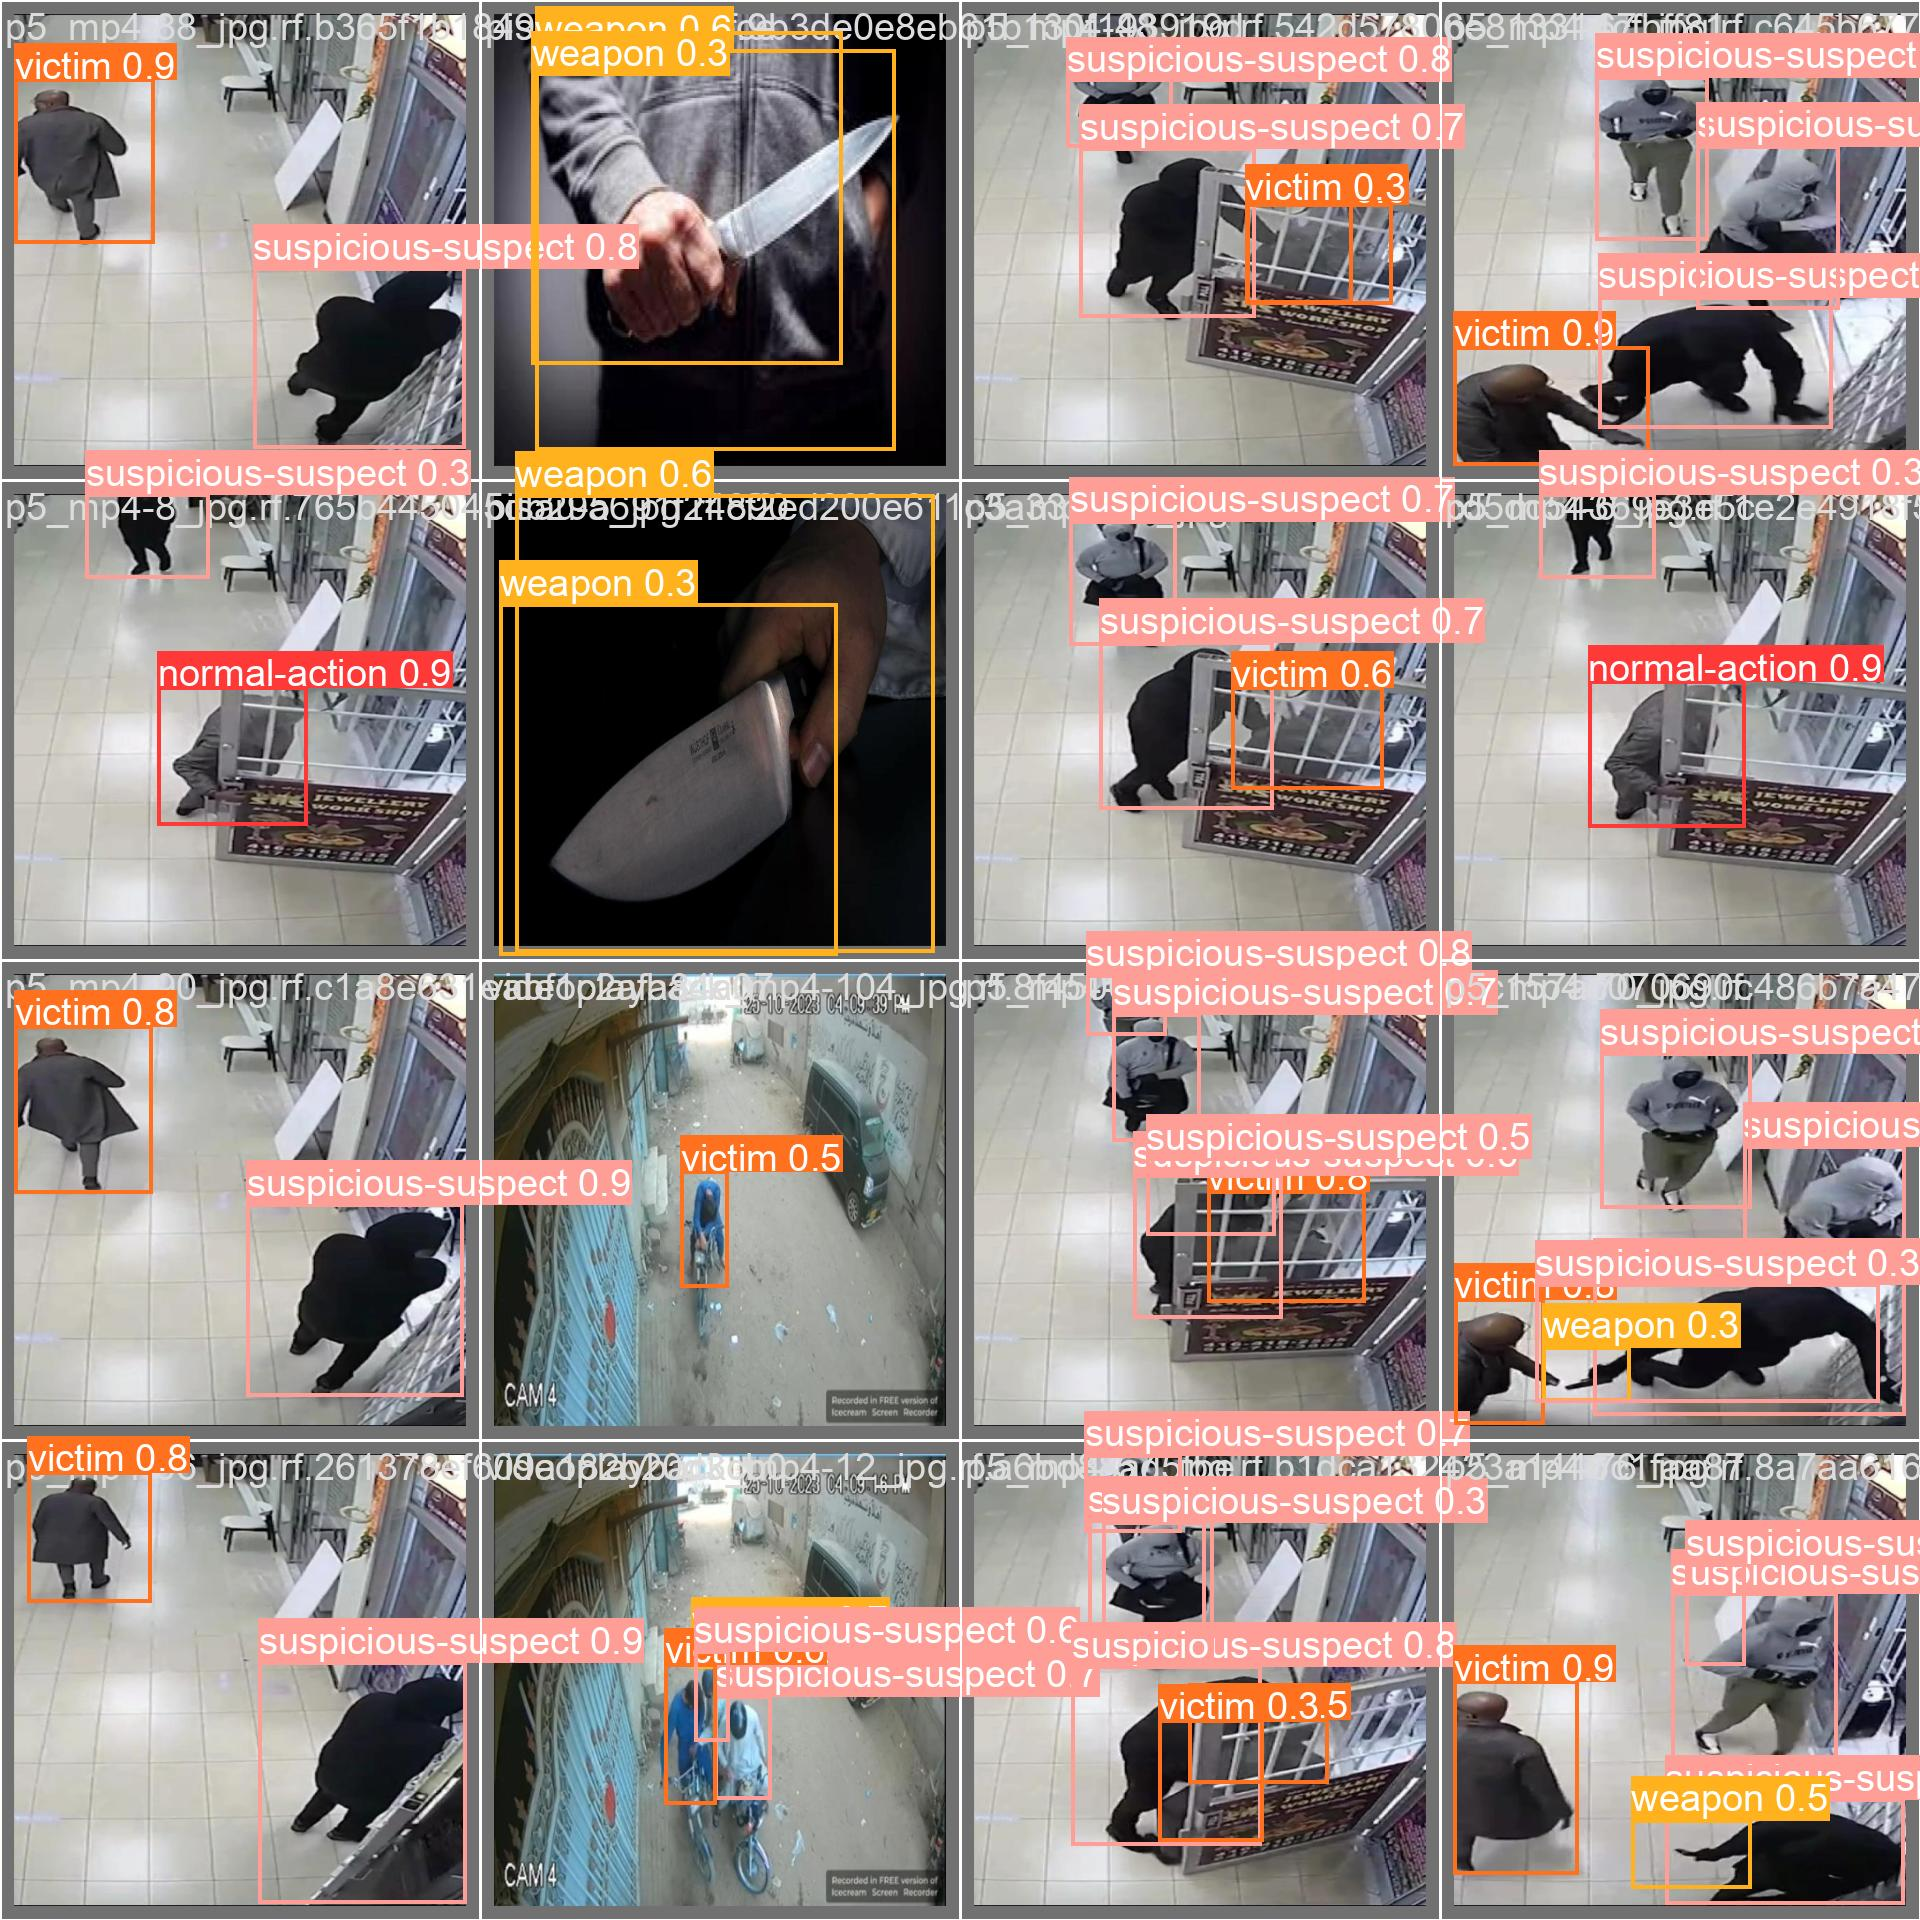

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

**Validation**

Validates the trained model using the validation dataset to ensure its performance and accuracy.

In [9]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/suspicious-detection-7/valid/labels.cache... 344 images, 0 backgrounds, 0 corrupt: 100% 344/344 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 41, len(boxes) = 1230. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:06<00:00,  3.14it/s]
                   all        344       1230      0.845      0.806      0.872      0.531
         normal-action        344        490      0.838      0.833      0.913      0.533
    suspicious-suspect        344        381        0.9      0.879      0.928      0.601
              

**Inference**

Loads the trained model and performs inference on a sample video, saving the results for further analysis.

In [ ]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform inference on a video
results = model.predict(source='/content/demo.mp4', conf=0.45, save=True)

# Print results
for result in results:
    print(result)
